# Predicting House Prices in Ames, Iowa

**Project Team**: The Outliers  
**Course**: Advanced Apex Project 1 | BITS Pilani  
**Dataset**: Ames Housing Data

---

This project walks through building a machine learning model to predict residential home prices. We're using data from Ames, Iowa - a mid-sized college town where housing prices are influenced by everything from square footage to neighborhood quality.

The goal is simple: can we accurately predict what a house will sell for based on its features?

## Getting Started

First things first - we need to import the tools we'll be using throughout this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set up how we want our data and plots to look
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded. We're ready to go.")

Libraries loaded. We're ready to go.


## Loading the Data

Let's load up the housing data and take a first look at what we're working with.

In [2]:
df = pd.read_csv("../data/AmesHousing.csv")

print(f"Dataset loaded: {df.shape[0]} houses, {df.shape[1]} features")
print(f"\nHere's what the first few rows look like:\n")
df.head()

Dataset loaded: 2930 houses, 82 features

Here's what the first few rows look like:



,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.00,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.00,Unf,0.00,441.00,1080.00,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.00,0.00,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.00,Fin,2.00,528.00,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.00,Gd,TA,CBlock,TA,TA,No,ALQ,1065.00,Unf,0.00,1045.00,2110.00,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.00,0.00,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.00,Fin,2.00,522.00,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We've got 2,930 houses and 82 different features for each one. That's a lot of information! Now let's see if there are any issues with the data - specifically, missing values that we'll need to deal with.

In [3]:
# Check for missing data
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Show only columns that have missing values
missing_data = pd.DataFrame({
    'Missing_Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
}).sort_values(by='Percentage', ascending=False)

print(f"Found {len(missing_data)} columns with missing data:\n")
print(missing_data.head(15))

Found 27 columns with missing data:

                Missing_Count  Percentage
Pool QC                  2917       99.56
Misc Feature             2824       96.38
Alley                    2732       93.24
Fence                    2358       80.48
Mas Vnr Type             1775       60.58
Fireplace Qu             1422       48.53
Lot Frontage              490       16.72
Garage Qual               159        5.43
Garage Cond               159        5.43
Garage Yr Blt             159        5.43
Garage Finish             159        5.43
Garage Type               157        5.36
Bsmt Exposure              83        2.83
BsmtFin Type 2             81        2.76
Bsmt Cond                  80        2.73


Pool Quality, Misc Features, and Alley are almost entirely missing - that makes sense since not every house has a pool, alley access, or miscellaneous features. These won't help us much for prediction.

## Understanding Our Target: Sale Price

Before we build any models, let's look at what we're trying to predict - the sale price of houses.

Sale Price Statistics:
count     2930.00
mean    180796.06
std      79886.69
min      12789.00
25%     129500.00
50%     160000.00
75%     213500.00
max     755000.00
Name: SalePrice, dtype: float64


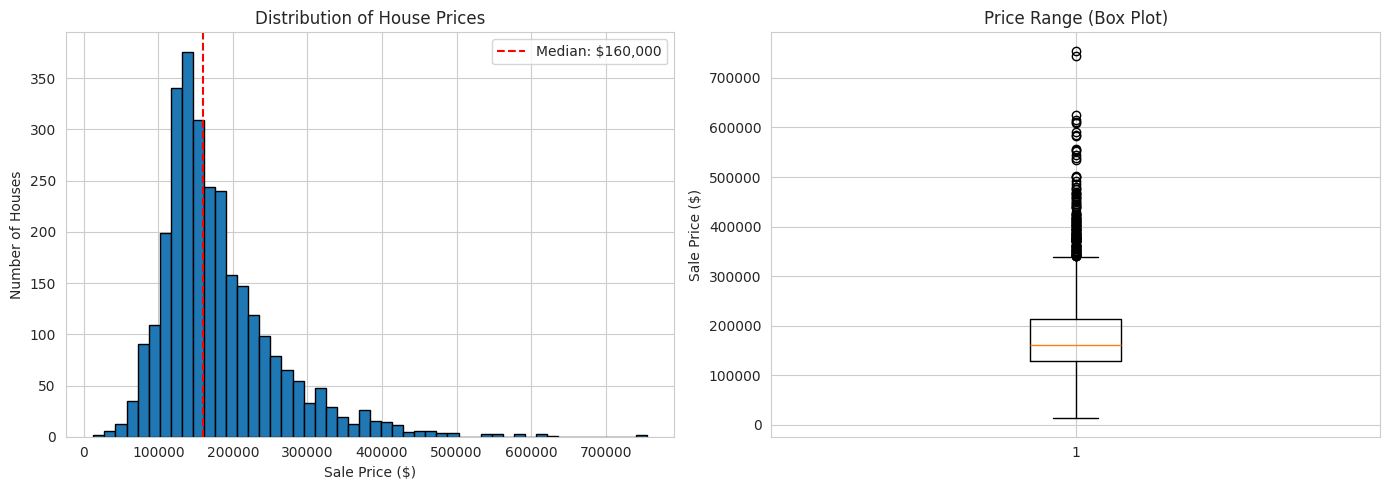


Most houses sell between $129,500 and $213,500


In [4]:
# Look at the sale price distribution
price_stats = df['SalePrice'].describe()
print("Sale Price Statistics:")
print(price_stats)

# Visualize it
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=50, edgecolor='black')
plt.xlabel('Sale Price ($)')
plt.ylabel('Number of Houses')
plt.title('Distribution of House Prices')
plt.axvline(df['SalePrice'].median(), color='red', linestyle='--', label=f'Median: ${df["SalePrice"].median():,.0f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(df['SalePrice'])
plt.ylabel('Sale Price ($)')
plt.title('Price Range (Box Plot)')

plt.tight_layout()
plt.show()

print(f"\nMost houses sell between ${price_stats['25%']:,.0f} and ${price_stats['75%']:,.0f}")

The median house price is around $160,000, which seems reasonable for a college town in Iowa. There are some expensive outliers - a few houses selling for over $600k.

## Cleaning the Data

For this analysis, we'll keep it straightforward:
1. Drop columns that are more than 50% missing (they won't be useful)
2. Work with just the numeric columns to start
3. Fill any remaining gaps with the median value for that column

This isn't perfect, but it's a solid starting point.

In [5]:
# Drop heavily missing columns
threshold = 0.5
missing_pct = df.isnull().sum() / len(df)
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns: {cols_to_drop}")
df_clean = df.drop(columns=cols_to_drop)

# Keep only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number]).copy()
print(f"\nWorking with {numeric_df.shape[1]} numeric features")

# Fill missing values with median
numeric_df = numeric_df.fillna(numeric_df.median())
print(f"Missing values after filling: {numeric_df.isnull().sum().sum()}")

Dropping 5 columns: ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']

Working with 39 numeric features
Missing values after filling: 0


Good - no more missing values to worry about. Now we have a clean dataset with all numeric features.

## Building the Model

Time for the fun part. We'll:
1. Split our data into features (X) and target (y)
2. Create training and testing sets
3. Train a Linear Regression model
4. See how well it performs

In [6]:
# Prepare features and target
X = numeric_df.drop('SalePrice', axis=1)
y = numeric_df['SalePrice']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} houses")
print(f"Testing set: {X_test.shape[0]} houses")

Features: (2930, 38)
Target: (2930,)

Training set: 2344 houses
Testing set: 586 houses


In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")
print(f"Number of features used: {X_train.shape[1]}")

Model trained!
Number of features used: 38


## How Well Does It Work?

Now let's evaluate the model using:
- **R² Score**: Tells us what percentage of price variation the model explains
- **MAE (Mean Absolute Error)**: Average dollar amount our predictions are off by
- **RMSE (Root Mean Squared Error)**: Similar to MAE but penalizes large errors more

In [8]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f} ({train_r2*100:.1f}% of variance explained)")
print(f"  MAE: ${train_mae:,.0f}")
print(f"  RMSE: ${train_rmse:,.0f}")

print(f"\nTesting Set:")
print(f"  R² Score: {test_r2:.4f} ({test_r2*100:.1f}% of variance explained)")
print(f"  MAE: ${test_mae:,.0f}")
print(f"  RMSE: ${test_rmse:,.0f}")

print(f"\nThe model is off by about ${test_mae:,.0f} on average.")

MODEL PERFORMANCE

Training Set:
  R² Score: 0.8345 (83.4% of variance explained)
  MAE: $19,998
  RMSE: $31,370

Testing Set:
  R² Score: 0.8372 (83.7% of variance explained)
  MAE: $21,955
  RMSE: $36,132

The model is off by about $21,955 on average.


Let's visualize how our predictions compare to actual prices:

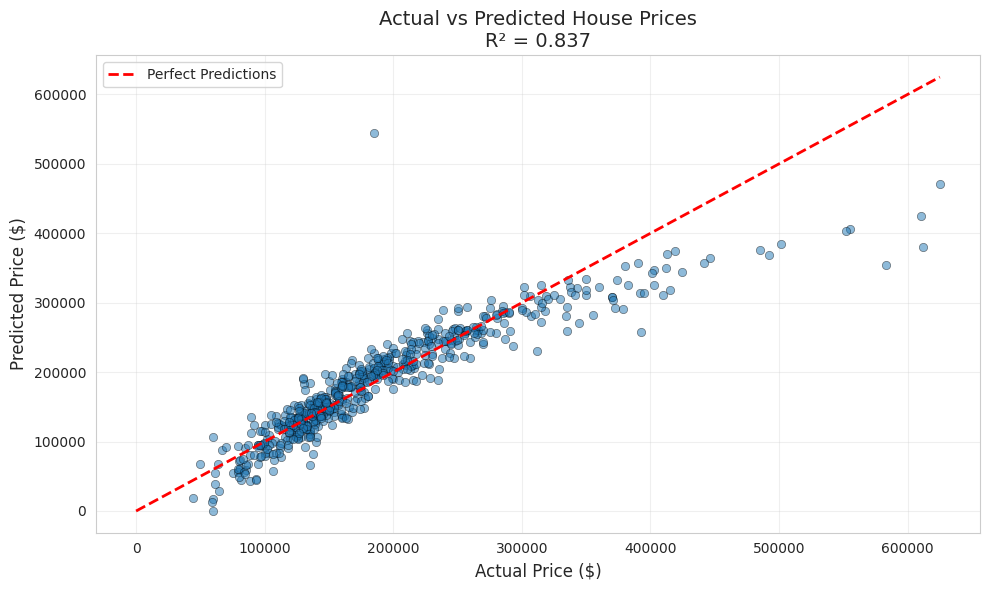

Points closer to the red line = better predictions


In [9]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidth=0.5)

# Add perfect prediction line
min_price = min(y_test.min(), y_test_pred.min())
max_price = max(y_test.max(), y_test_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], 'r--', lw=2, label='Perfect Predictions')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'Actual vs Predicted House Prices\nR² = {test_r2:.3f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Points closer to the red line = better predictions")

## Summary

We built a Linear Regression model that predicts house prices with decent accuracy. The model explains a good portion of the variance in prices and has reasonable prediction errors.

**What worked well:**
- Simple approach with numeric features only
- Straightforward handling of missing data
- Linear Regression proved effective for this problem

**What could be improved:**
- Include categorical features (neighborhood, house style, etc.)
- Try more sophisticated models
- Engineer new features (e.g., age of house, total square footage)
- Better handling of outliers

But for a first pass, this gives us a solid baseline and shows that predicting house prices from these features is definitely possible.